In [1]:
import warnings 

warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [3]:
plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [4]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [5]:
covid_data=pd.read_csv('data/Covid_case.csv')
covid_data.head()

,Unnamed: 0,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt,Unnamed: 15
0,0,2.255638,14285339.0,13229116.0,29546.0,266414.0,2021-09-25 10:49:15.225,2441.0,298401,1056223.0,12930715.0,646.0,20210925,00:00,2021-09-26 10:29:10.433,3269
1,1,2.237343,14221685.0,13191185.0,28206.0,264492.0,2021-09-24 09:53:29.116,2434.0,295132,1030500.0,12896053.0,645.0,20210924,00:00,NaN,2433
2,2,2.231558,14151069.0,13116349.0,27430.0,262842.0,2021-09-23 10:01:14.491,2427.0,292699,1034720.0,12823650.0,644.0,20210923,00:00,NaN,1716
3,3,2.218799,14112435.0,13114439.0,26752.0,261812.0,2021-09-22 09:35:53.93,2419.0,290983,997996.0,12823456.0,643.0,20210922,00:00,NaN,1720
4,4,2.205520,14081284.0,13115409.0,26760.0,260090.0,2021-09-21 09:39:49.437,2413.0,289263,965875.0,12826146.0,642.0,20210921,00:00,NaN,1729


In [35]:
covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.tail()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2020-02-04,3.0,16,0.0,2020,2
2020-02-03,1.0,15,0.0,2020,2
2020-02-02,13.0,2,2.0,2020,2
2020-02-01,2.0,0,0.0,2020,2
2020-01-01,0.0,0,0.0,2020,1


In [7]:
covid_data_new.describe().daily_decideCnt

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: daily_decideCnt, dtype: float64

In [8]:
covid_data_2018_summer=covid_data_new[(covid_data_new.year==2018) & ((covid_data_new.month==7)|(covid_data_new.month==8))]
covid_data_2019_summer=covid_data_new[(covid_data_new.year==2019) & ((covid_data_new.month==7)|(covid_data_new.month==8))]
covid_data_2020_summer=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==7)|(covid_data_new.month==8))]


In [9]:
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])

traffic_data.index=pd.to_datetime(traffic_data['집계일자'],format='%Y%m%d')
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]

traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275
2018-01-01,가락,615,14,5,14,96,26,770
2018-01-01,가락(개),2358,31,48,57,131,273,2898
2018-01-01,가락(개),7148,27,71,27,267,378,7918
2018-01-01,가락(개),2946,29,52,48,150,357,3582


In [10]:
traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,
2018-01-01,5562671,64729,140284,36796,34705,240045,6079230
2018-01-02,4945308,200328,257620,163881,234282,290196,6091615
2018-01-03,4841053,232174,293244,212214,294425,289377,6162487
2018-01-04,4902656,232305,293413,209227,300632,291083,6229316
2018-01-05,5342859,233726,299322,209493,299666,310678,6695744


In [34]:
data_mart_total=covid_data_new.join(traffic_data_total, how='right')
data_mart_total['date']=data_mart_total.index
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
data_mart_total['day_of_week']=data_mart_total.index.dayofweek
data_mart_total.day_of_week=data_mart_total.day_of_week.apply(lambda x : days[x])
data_mart_total.decideCnt=data_mart_total.decideCnt.fillna(0)
data_mart_total.daily_decideCnt=data_mart_total.daily_decideCnt.fillna(0)
data_mart_total.deathCnt=data_mart_total.deathCnt.fillna(0)
data_mart_total['year']=data_mart_total.index.year
data_mart_total['month']=data_mart_total.index.month
data_mart_total[(data_mart_total['month']==7)&(data_mart_total['year']==2019)]

,daily_decideCnt,decideCnt,deathCnt,year,month,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,date,day_of_week
집계일자,,,,,,,,,,,,,,
2019-07-01,0.0,0.0,0.0,2019,7,5499495,226803,290883,207884,301470,314913,6841448,2019-07-01,MON
2019-07-02,0.0,0.0,0.0,2019,7,5400435,244128,309106,233492,328113,309834,6825108,2019-07-02,TUE
2019-07-03,0.0,0.0,0.0,2019,7,5495463,239213,311296,232163,332097,314905,6925137,2019-07-03,WED
2019-07-04,0.0,0.0,0.0,2019,7,5538127,238983,310001,229755,334105,312825,6963796,2019-07-04,THU
2019-07-05,0.0,0.0,0.0,2019,7,6169847,238940,315450,224762,329166,338398,7616563,2019-07-05,FRI
2019-07-06,0.0,0.0,0.0,2019,7,6483287,124048,211592,108575,174218,296770,7398490,2019-07-06,SAT
2019-07-07,0.0,0.0,0.0,2019,7,5738776,56659,148448,44621,43575,253857,6285936,2019-07-07,SUN
2019-07-08,0.0,0.0,0.0,2019,7,5605586,226611,292316,210631,315484,320596,6971224,2019-07-08,MON
2019-07-09,0.0,0.0,0.0,2019,7,5511175,244874,315455,242414,346627,313813,6974358,2019-07-09,TUE


<AxesSubplot:title={'center':'Daily Trend Of COVID-19 Confirmed Cases'}, xlabel='stateDt', ylabel='daily_decideCnt'>

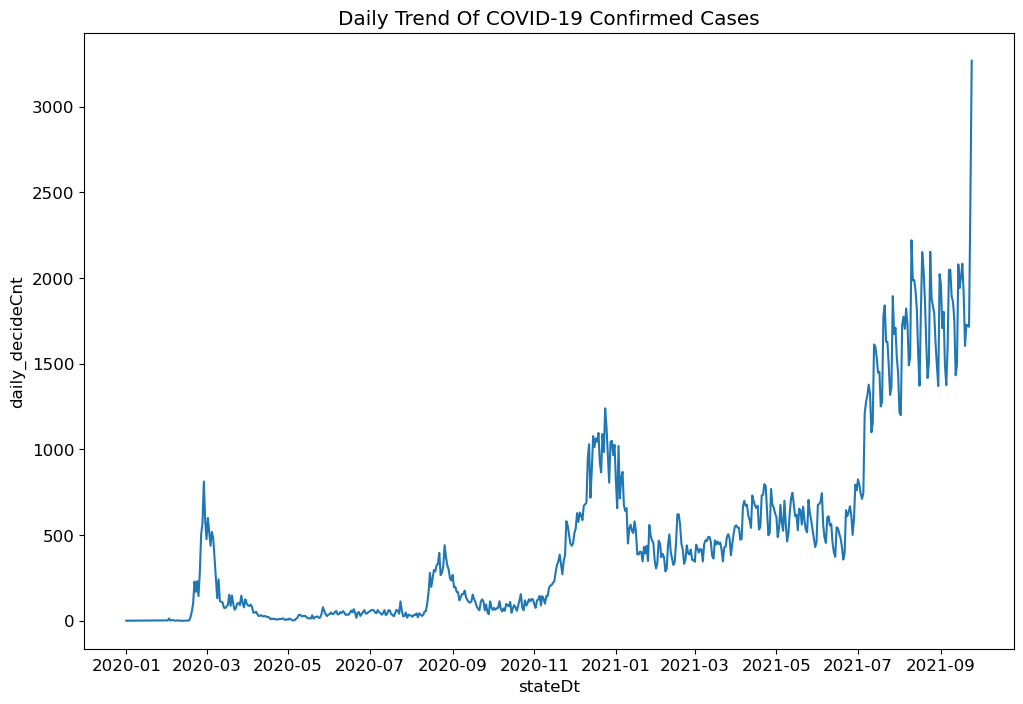

In [31]:
plt.figure(figsize=(12,8))
plt.title('Daily Trend Of COVID-19 Confirmed Cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='daily_decideCnt')

In [46]:
def graphing(type_traffic,day_of_w):
    graph=data_mart_total[((data_mart_total.day_of_week==day_of_w))&((data_mart_total.year==2020)&((data_mart_total.month==7)|(data_mart_total.month==8)))]
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (6,4)
    plt.rcParams['font.size'] = 5
    fig, ax1 = plt.subplots()

    ax1.plot(graph['date'], graph[type_traffic], color='green')
    ax2 = ax1.twinx()
    ax2.plot(graph['date'], graph['daily_decideCnt'], color='deeppink')

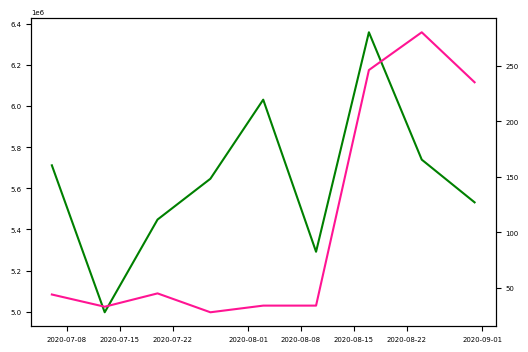

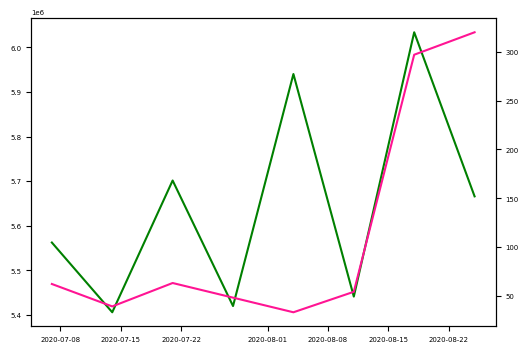

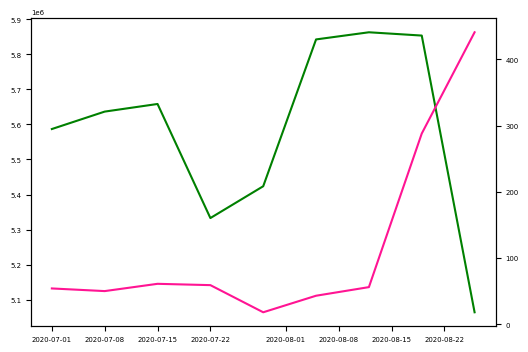

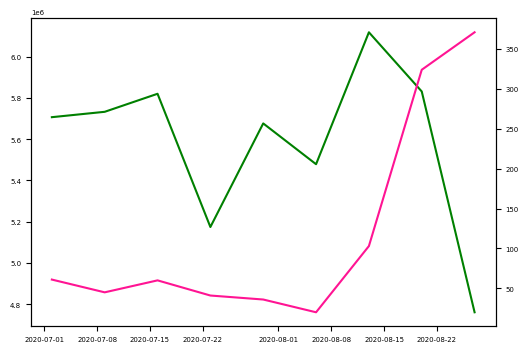

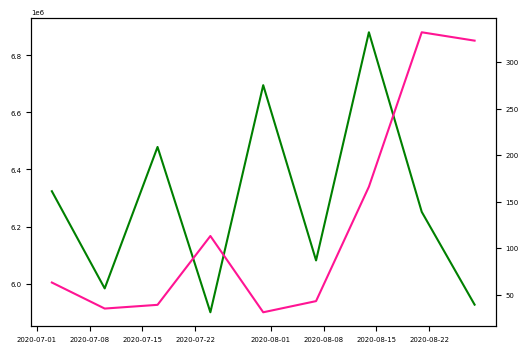

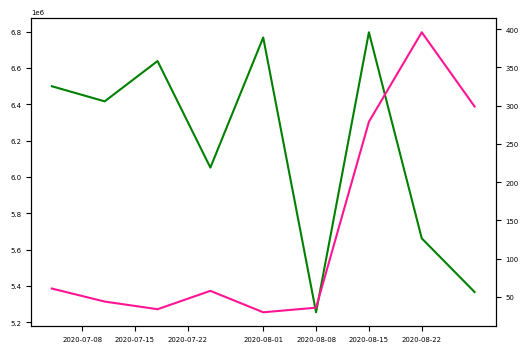

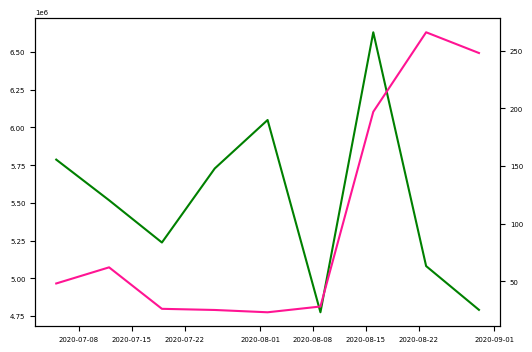

In [47]:
days=['MON','TUE','WED','THU','FRI','SAT','SUN']
for i in days:
    graphing('1종교통량',i)

In [ ]:
((data_mart_total.day_of_week=='MON')|(data_mart_total.day_of_week=='TUE')
                                    |(data_mart_total.day_of_week=='WED')
                                    |(data_mart_total.day_of_week=='THU')
                                    |(data_mart_total.day_of_week=='FRI')
                                    |(data_mart_total.day_of_week=='SAT')
                                    |(data_mart_total.day_of_week=='SUN'))